In [21]:
from thinkdsp import TriangleSignal
from thinkdsp import SquareSignal
from thinkdsp import SinSignal

In [79]:
from thinkdsp import Sinusoid
import math
import thinkdsp
import numpy as np

Класс, расширяющий Signal и предоставляющий функцию evaluate для оценки

In [80]:
class MySawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [68]:
mySawtooth = MySawtoothSignal().make_wave(duration=2,framerate=40000)
myTriangle = TriangleSignal().make_wave(duration=2,framerate=40000)
mySquare = SquareSignal().make_wave(duration=2,framerate=40000)

Построим треугольный и пилообразный сигнал на одном рафике для оценки. Пилообразная волна уменьшается меньше, а также включает в себя и четкие, и нечеткие гармоники.

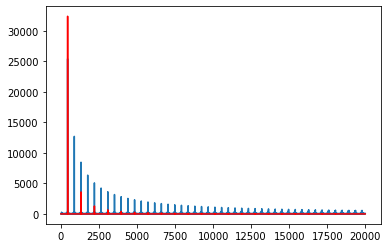

In [70]:
mySawtooth.make_spectrum().plot()
myTriangle.make_spectrum().plot(color ='red')

От квадратного сигнала также отличается наличием четких гармоник, помимо нечетных

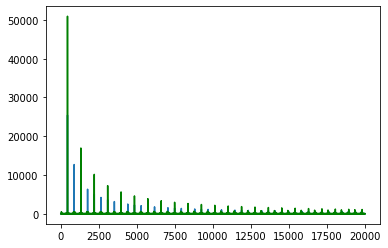

In [71]:
mySawtooth.make_spectrum().plot()
mySquare.make_spectrum().plot(color ='green')

Создадим сигнал с такой частотой, чтобы услышать последствие "завернутости" гармоник.
В таком случае, создавая сигнал по второй гармонике(1000) мы услышим звук, что аналогичен звуку на частоте 3000.

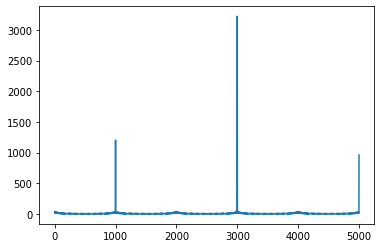

In [4]:
sqSignal = SquareSignal(3000).make_wave(duration=0.5,framerate=10000)
sqSignal.make_spectrum().plot()

In [5]:
sqSignal.make_audio()

In [6]:
SquareSignal(1000).make_wave(duration=0.5, framerate=10000).make_audio()

Создадим треугольный сигнал

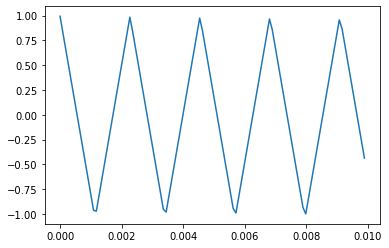

In [8]:
triangle_for_ex = TriangleSignal(440).make_wave(duration=0.01)
triangle_for_ex.plot()

Создадим spectrum, чтобы распечатать его первый элемент. В итоге мы получим некоторое комплексное число

In [16]:
spectrum_for_ex = triangle_for_ex.make_spectrum()
spectrum_for_ex.hs[0]

(1.0769163338864018e-14+0j)

Изменим значение, установив его равным 100.
Таким образом, произойдет смещение вверх. Изменив это значение еще больше - значение будет еще выше.

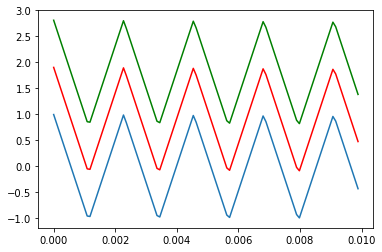

In [18]:
spectrum_for_ex.hs[0] = 100
triangle_for_ex.plot()
spectrum_for_ex.make_wave().plot(color ='red')
spectrum_for_ex.hs[0] = 200
spectrum_for_ex.make_wave().plot(color = 'green')

Функция, что принимает на вход Spectrum и изменяет все элементы hs на соответствующую частоту из fs.

In [52]:
def spectrum_changer(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

Применим функцию к треугольному и прямоугольному сигналу. Применение делает сигнал более высоким

In [87]:
sq_spectrum = SquareSignal(850).make_wave().make_spectrum()
sq_spectrum.make_wave().make_audio()

In [88]:
spectrum_changer(sq_spectrum)
sq_spectrum.scale(850)
sq_spectrum.make_wave().make_audio()

In [91]:
tr_spectrum = TriangleSignal(850).make_wave().make_spectrum()
tr_spectrum.make_wave().make_audio()

In [92]:
spectrum_changer(tr_spectrum)
tr_spectrum.make_wave().make_audio()

Необходимо получить сигнал, который будет обладать четкими и нечеткими гармониками(как пилообразный, и чтобы эти гармоники уменьшались пропорционально 1/f^2(как у треугольного сигнала). Для этого попробуем изменить пилообразный сигнал, который обладает первым из необходимых свойств.

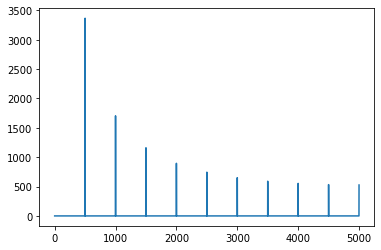

In [82]:
wave = MySawtoothSignal(500).make_wave(duration = 1, framerate = 10000)
wave.make_spectrum().plot()

Применив функцию, что вы использовали в прошлом задании, мы сможем смоделировать необходимый сигнал

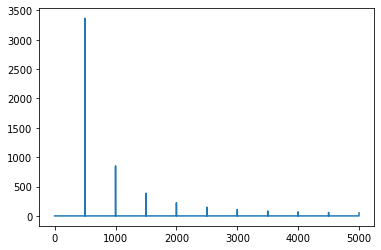

In [84]:
sp = wave.make_spectrum()
spectrum_changer(sp)
sp.scale(500)
sp.plot()
